<a href="https://colab.research.google.com/github/bhindia/scRNA/blob/master/Cluster_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
pip install sgt # installing Sequence Graph Transform (sgt) package

In [ ]:
pip install pandarallel # installing pandarallel package for multi-processing

In [ ]:
import sgt                  # import sgt package
from sgt import SGT         # import SGT from sgt package

In [ ]:
import numpy as np                            # import numpy as np
import pandas as pd                           # import pandas as pd
import time                                   # import time
from pandarallel import pandarallel           # required library for multiprocessing
from sklearn.decomposition import PCA         # import PCA from sklearn
from sklearn.metrics import calinski_harabasz_score # import calinski_harabasz_score from sklearn
from sklearn.metrics import silhouette_score        # import silhouette_score from sklearn
import seaborn as sns                         # import seaborn as sns
import matplotlib.pyplot as plt               # import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.cluster import KMeans            # import KMeans from sklearn
np.random.seed(7)                             # fix random seed for reproducibility



In [ ]:
train = pd.read_table('/gdrive/My Drive/Capstone/Cluster-Data.tsv',sep='\t',header=0,skipinitialspace=True) # Reading the file

In [ ]:
train= train[['aminoAcid','Subject','Year','Day','Status']] # Selecting specific columns


In [ ]:
train.count() # Count of different variables

aminoAcid    225693
Subject      225693
Year         225693
Day          225693
Status       225693
dtype: int64

In [ ]:
seq= train['aminoAcid'].map(list)   # changing each aminoacid to a list
seq=seq.to_dict()                   # Changing seq list into a dictionary
seq = list(map(list, seq.items()))  # changing into a list contains multiple lists with ids and sequences
corpus = pd.DataFrame(seq, columns= ['id','sequence']) # converts seq list into a pandas dataframe with columns id and sequence
corpus                              # printing corpus

,id,sequence
0,0,"[C, T, S, S, H, H, A, L, G, R, S, Y, N, E, Q, ..."
1,1,"[C, A, I, G, D, R, R, S, L, N, T, E, A, F, F]"
2,2,"[C, A, S, A, W, A, L, D, T, S, Y, E, Q, Y, F]"
3,3,"[C, A, S, G, Q, T, A, S, G, A, N, V, L, T, F]"
4,4,"[C, A, S, G, Q, T, R, G, E, T, Q, Y, F]"
...,...,...
225688,225688,"[C, A, S, S, F, T, N, M, G, T, S, G, G, T, L, ..."
225689,225689,"[C, A, S, S, L, G, T, R, T, H, T, H, K, S, Y, ..."
225690,225690,"[C, A, S, S, L, V, F, S, S, F, G, I, G, G, T, ..."
225691,225691,"[C, A, S, S, N, R, G, T, G, L, F, G, A, G, A, ..."


In [ ]:
# alphabets            The set of alphabets that make up all the sequences in the dataset. 
#                      If not passed, the alphabet set is automatically computed as the unique set of elements that make all the sequences. 
#                      A list or 1d-array of the set of elements that make up the sequences. For example, np.array(["A", "B", "C"].

# lengthsensitive      Default false. This is set to true if the embedding 
#                      should have the information of the length of the sequence.
#                      If set to false then the embedding of two sequences with
#                      similar pattern but different lengths will be the same.
#                      lengthsensitive = false is similar to length-normalization.


#  kappa              Tuning parameter, kappa > 0, to change the extraction of 
#                     long-term dependency. Higher the value the lesser
#                     the long-term dependency captured in the embedding.
#                     Typical values for kappa are 1, 5, 10.

# flatten              Default True. If True the SGT embedding is flattened and returned as
#                     a vector. Otherwise, it is returned as a matrix with the row and col
#                     names same as the alphabets. The matrix form is used for            
#                     interpretation purposes. Especially, to understand how the alphabets
#                     are "related". Otherwise, for applying machine learning or deep
#                     learning algorithms, the embedding vectors are required.

# mode               Choices in {'default', 'multiprocessing'}. Note: 'multiprocessing' 
#                    mode requires pandas==1.0.3 + and pandarallel libraries.
    
#processors          Used if mode is 'multiprocessing'. By default, the 
#                    number of processors used in multiprocessing is number of available (1)
%%time
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 
             'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'Y']  
sgt_ = SGT(alphabets=alphabets, lengthsensitive=True, kappa=5, flatten=True,mode='multiprocessing')

#                   Extract SGT embeddings for all sequences in a corpus. It finds
#                   the alphabets encompassing all the sequences in the corpus, if not inputted.
#                   Input: corpus - A list of sequences. Each sequence is a list of alphabets.
#                   Output: sgt embedding of all sequences in the corpus.

sgtembedding_df = sgt_.fit_transform(corpus)    

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 721 ms, sys: 977 ms, total: 1.7 s
Wall time: 10min 30s


In [ ]:
sgtembedding_df   # printing sgt embeddings

,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)","(A, M)","(A, N)","(A, P)","(A, Q)","(A, R)","(A, S)","(A, T)","(A, V)","(A, W)","(A, Y)","(C, A)","(C, C)","(C, D)","(C, E)","(C, F)","(C, G)","(C, H)","(C, I)","(C, K)","(C, L)","(C, M)","(C, N)","(C, P)","(C, Q)","(C, R)","(C, S)","(C, T)","(C, V)","(C, W)",...,"(W, A)","(W, C)","(W, D)","(W, E)","(W, F)","(W, G)","(W, H)","(W, I)","(W, K)","(W, L)","(W, M)","(W, N)","(W, P)","(W, Q)","(W, R)","(W, S)","(W, T)","(W, V)","(W, W)","(W, Y)","(Y, A)","(Y, C)","(Y, D)","(Y, E)","(Y, F)","(Y, G)","(Y, H)","(Y, I)","(Y, K)","(Y, L)","(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
0,0.0,0.000000,0.0,0.000000e+00,1.607046e-03,1.895906e-04,0.238507,0.000000,0.000000,0.00000,0.648329,0.0000,0.004368,0.0,5.911993e-04,0.087742,0.032278,0.000000,0.000000,0.000000,1.187456e-02,0.004368,0.0,0.000000e+00,3.983470e-06,4.699480e-07,0.000591,0.028138,0.00000,0.000000,0.001607,0.000000,1.082819e-05,0.0,1.465437e-06,0.000217,0.191717,6.483288e-01,0.000000e+00,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.238507,0.028138,0.0,0.0,0.0,0.0,0.0,0.0,0.648329,0.0,0.087742,0.0,0.0,0.000000,0.0,0.0,0.000000
1,1.0,0.000029,0.0,8.557262e-02,7.803212e-05,4.798385e-01,0.232610,0.000000,0.632301,0.00000,0.001567,0.0000,0.000577,0.0,0.000000e+00,0.027442,0.004260,0.000212,0.000000,0.000000,0.000000e+00,0.550450,0.0,3.148041e-02,2.870641e-05,3.386626e-06,0.085573,0.000000,0.23261,0.000000,0.000577,0.000000,2.121133e-04,0.0,0.000000e+00,0.010095,0.001567,7.803212e-05,0.000000e+00,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,2.0,0.214493,0.0,1.867278e-01,3.420039e-03,1.702737e-04,0.000000,0.000000,0.000000,0.00000,0.507579,0.0000,0.000000,0.0,1.258162e-03,0.000000,0.479194,0.068693,0.000000,0.550455,8.093187e-03,0.507579,0.0,1.567317e-03,2.870641e-05,1.429208e-06,0.000000,0.000000,0.00000,0.000000,0.004260,0.000000,0.000000e+00,0.0,1.056050e-05,0.000000,0.202499,5.765837e-04,0.000000e+00,0.03148,...,0.632301,0.0,0.085573,0.001567,0.000078,0.0,0.0,0.0,0.0,0.23261,0.0,0.0,0.0,0.000577,0.0,0.011581,0.03148,0.0,0.0,0.003709,0.0,0.0,0.000000,0.632301,0.550450,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.232610,0.0,0.0,0.000000,0.0,0.0,0.085573
3,3.0,0.068693,0.0,0.000000e+00,0.000000e+00,9.296546e-03,0.214492,0.000000,0.000000,0.00000,0.068693,0.0000,0.507574,0.0,8.557262e-02,0.000000,0.583050,0.027405,0.186726,0.000000,0.000000e+00,0.507574,0.0,0.000000e+00,0.000000e+00,1.429208e-06,0.074495,0.000000,0.00000,0.000000,0.000011,0.000000,7.803212e-05,0.0,3.148041e-02,0.000000,0.202499,1.008184e-02,2.870641e-05,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,4.0,0.000000,0.0,0.000000e+00,1.523096e-03,2.789648e-05,0.196786,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,7.239344e-02,0.011254,0.614461,0.026632,0.000000,0.000000,7.583049e-05,0.614461,0.0,0.000000e+00,5.603157e-04,1.026254e-05,0.072393,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.663206e-02,0.004140,0.226047,9.797387e-03,0.000000e+00,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.614461,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
sgtembedding_df = sgtembedding_df.set_index('id') # setting id column as the dataframe index
sgtembedding_df

,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)","(A, M)","(A, N)","(A, P)","(A, Q)","(A, R)","(A, S)","(A, T)","(A, V)","(A, W)","(A, Y)","(C, A)","(C, C)","(C, D)","(C, E)","(C, F)","(C, G)","(C, H)","(C, I)","(C, K)","(C, L)","(C, M)","(C, N)","(C, P)","(C, Q)","(C, R)","(C, S)","(C, T)","(C, V)","(C, W)","(C, Y)",...,"(W, A)","(W, C)","(W, D)","(W, E)","(W, F)","(W, G)","(W, H)","(W, I)","(W, K)","(W, L)","(W, M)","(W, N)","(W, P)","(W, Q)","(W, R)","(W, S)","(W, T)","(W, V)","(W, W)","(W, Y)","(Y, A)","(Y, C)","(Y, D)","(Y, E)","(Y, F)","(Y, G)","(Y, H)","(Y, I)","(Y, K)","(Y, L)","(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.0,0.000000e+00,1.607046e-03,1.895906e-04,0.238507,0.000000,0.000000,0.00000,0.648329,0.0000,0.004368,0.0,5.911993e-04,0.087742,0.032278,0.000000,0.000000,0.000000,1.187456e-02,0.004368,0.0,0.000000e+00,3.983470e-06,4.699480e-07,0.000591,0.028138,0.00000,0.000000,0.001607,0.000000,1.082819e-05,0.0,1.465437e-06,0.000217,0.191717,6.483288e-01,0.000000e+00,0.00000,2.943408e-05,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.238507,0.028138,0.0,0.0,0.0,0.0,0.0,0.0,0.648329,0.0,0.087742,0.0,0.0,0.000000,0.0,0.0,0.000000
1.0,0.000029,0.0,8.557262e-02,7.803212e-05,4.798385e-01,0.232610,0.000000,0.632301,0.00000,0.001567,0.0000,0.000577,0.0,0.000000e+00,0.027442,0.004260,0.000212,0.000000,0.000000,0.000000e+00,0.550450,0.0,3.148041e-02,2.870641e-05,3.386626e-06,0.085573,0.000000,0.23261,0.000000,0.000577,0.000000,2.121133e-04,0.0,0.000000e+00,0.010095,0.001567,7.803212e-05,0.000000e+00,0.00000,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2.0,0.214493,0.0,1.867278e-01,3.420039e-03,1.702737e-04,0.000000,0.000000,0.000000,0.00000,0.507579,0.0000,0.000000,0.0,1.258162e-03,0.000000,0.479194,0.068693,0.000000,0.550455,8.093187e-03,0.507579,0.0,1.567317e-03,2.870641e-05,1.429208e-06,0.000000,0.000000,0.00000,0.000000,0.004260,0.000000,0.000000e+00,0.0,1.056050e-05,0.000000,0.202499,5.765837e-04,0.000000e+00,0.03148,6.793091e-05,...,0.632301,0.0,0.085573,0.001567,0.000078,0.0,0.0,0.0,0.0,0.23261,0.0,0.0,0.0,0.000577,0.0,0.011581,0.03148,0.0,0.0,0.003709,0.0,0.0,0.000000,0.632301,0.550450,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.232610,0.0,0.0,0.000000,0.0,0.0,0.085573
3.0,0.068693,0.0,0.000000e+00,0.000000e+00,9.296546e-03,0.214492,0.000000,0.000000,0.00000,0.068693,0.0000,0.507574,0.0,8.557262e-02,0.000000,0.583050,0.027405,0.186726,0.000000,0.000000e+00,0.507574,0.0,0.000000e+00,0.000000e+00,1.429208e-06,0.074495,0.000000,0.00000,0.000000,0.000011,0.000000,7.803212e-05,0.0,3.148041e-02,0.000000,0.202499,1.008184e-02,2.870641e-05,0.00000,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4.0,0.000000,0.0,0.000000e+00,1.523096e-03,2.789648e-05,0.196786,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,7.239344e-02,0.011254,0.614461,0.026632,0.000000,0.000000,7.583049e-05,0.614461,0.0,0.000000e+00,5.603157e-04,1.026254e-05,0.072393,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.663206e-02,0.004140,0.226047,9.797387e-03,0.000000e+00,0.00000,2.789648e-05,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.614461,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,..

In [ ]:
pca = PCA(n_components=60)                   # we choose 60 components   
pca.fit(sgtembedding_df)                     # fit the model with the selected number of components. In our case 85.
X = pca.transform(sgtembedding_df)            
print(np.sum(pca.explained_variance_ratio_)) # print the explained variance ratio
PCA_components = pd.DataFrame(X)             # changing to pandas dataframe


0.7328155837319928


In [ ]:
PCA_components                               # printing PCA components                 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.172733,-0.486035,0.392647,0.125652,0.868389,0.075513,-0.001450,0.034081,0.164355,0.196360,0.636097,-0.119937,0.271212,-0.217505,0.116443,0.251581,0.161440,-0.351381,-0.066433,-0.244444,0.347719,0.343253,0.253985,-0.265865,-0.191569,0.226938,0.165460,-0.107342,0.060237,-0.359826,0.145962,0.206087,0.148895,0.034317,0.199901,-0.008095,0.117464,-0.179896,0.219296,-0.105318,0.296336,0.009075,0.344984,0.181343,0.115967,-0.160535,0.054576,-0.175017,0.092456,0.047673,0.136646,0.066581,-0.193689,-0.196990,-0.140787,-0.203135,0.160357,-0.007917,-0.068148,-0.066860
1,0.768136,-0.499097,-0.078089,0.352953,-0.175531,0.778755,-0.097926,0.271714,0.033506,0.022738,0.177694,-0.318575,-0.078601,-0.094234,0.458888,-0.106386,0.031851,0.218432,-0.195001,-0.024846,0.000074,0.346169,-0.111872,-0.240710,0.107161,-0.161021,0.051654,0.085503,-0.302698,-0.002055,-0.164676,-0.101513,0.156080,-0.170145,0.318644,0.300609,0.167846,0.045860,-0.441868,-0.051465,-0.250961,-0.044931,0.059224,-0.117214,0.362493,-0.160500,0.015481,0.160802,0.158029,-0.129353,0.288068,0.281201,-0.127435,0.015555,-0.099861,-0.258571,0.367707,0.003337,-0.017940,-0.032175
2,-0.852661,-0.337012,0.219769,0.336656,0.359421,0.085480,-0.007389,0.166672,-0.001329,-0.197751,0.354830,-0.032056,-0.294318,0.203832,0.142172,-0.340147,0.187952,0.150280,0.037012,-0.081155,-0.014992,0.067196,-0.087981,-0.116954,0.042422,-0.054836,0.058837,-0.171951,0.136025,-0.137789,-0.219113,0.286313,0.137592,-0.031417,-0.156987,0.035824,-0.181013,-0.187236,0.074306,-0.047825,-0.199926,0.062062,-0.046154,-0.078272,-0.271784,0.025480,-0.217302,0.027536,-0.216542,0.178017,-0.307534,0.171115,-0.173472,-0.171325,-0.045477,-0.197331,-0.248362,0.011887,0.059489,0.259779
3,0.265449,0.244052,-0.305380,0.204405,-0.086330,-0.078581,0.281465,-0.172931,0.479530,0.109559,0.036529,0.149995,0.132800,1.193824,0.117351,0.155613,0.048140,-0.080567,-0.052140,0.182903,0.292242,0.113670,-0.311174,0.109843,0.048417,-0.351681,0.202073,-0.026548,0.052378,0.334669,-0.204970,0.083444,0.233624,-0.220066,-0.015970,-0.164582,0.238938,-0.047735,0.101079,-0.323615,-0.051636,0.038711,-0.066908,0.149284,-0.040049,0.154249,-0.009496,0.131616,-0.027368,-0.023522,-0.130999,0.058712,0.048378,-0.033455,0.148592,0.018800,-0.038956,-0.022787,0.066724,-0.018668
4,-0.640566,-0.215674,0.007240,0.149329,-0.359301,-0.217702,-0.067258,-0.258521,-0.280945,-0.019351,-0.456364,0.109003,0.150527,0.028023,0.306115,0.526006,0.017708,-0.091144,-0.070359,-0.101912,0.138650,0.244011,0.153213,0.118861,0.229354,-0.201963,0.045113,-0.109405,-0.151923,0.386848,0.016002,0.053098,-0.084230,-0.216731,-0.129493,-0.062378,0.048238,-0.034779,0.007033,-0.164063,-0.022873,-0.027554,-0.118707,0.166634,0.000668,0.035974,0.082900,0.088045,0.091952,-0.149917,-0.123248,-0.037068,0.167529,0.069535,0.019787,0.019077,0.005108,-0.055808,0.061629,-0.024137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225688,-0.756769,-0.144448,-0.131479,-0.133750,-0.782284,-0.155709,-0.061816,-0.179404,-0.128653,-0.313173,0.667070,0.090710,0.377517,0.048802,0.056467,-0.260865,0.080824,-0.026714,0.146895,-0.099077,0.077787,-0.114561,-0.095383,-0.066901,0.040694,-0.131410,0.224572,-0.146510,0.365999,0.076656,0.012860,-0.023042,-0.174742,0.104049,0.018309,-0.235391,-0.006077,0.099006,-0.010013,0.003036,0.013956,0.028898,-0.123592,-0.248183,0.164941,-0.024318,0.097945,0.005464,-0.015276,0.057968,-0.144813,0.054588,0.003919,0.034924,0.188048,-0.146611,-0.083883,0.166286,0.157310,-0.041324
225689,0.185305,-0.508653,0.300279,-0.464323,0.667582,0.097502,-0.013114,-0.037982,-0.041624,0.056056,0.781831,-0.312906,0.342720,-0.210702,0.135591,0.36175

Text(0, 0.5, 'variance %')

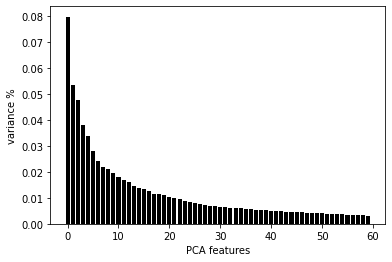

In [ ]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

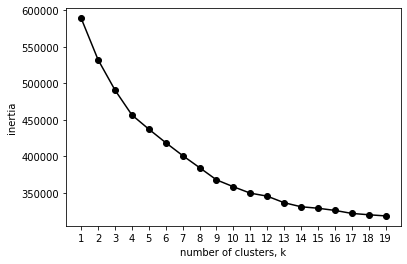

In [ ]:
# Plotting elbow plot
ks = range(1,20)
inertias = []
for k in ks:
    #Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

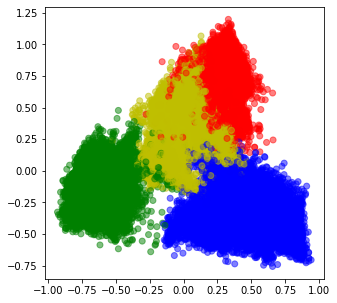

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter =300,init='k-means++', n_init=10)  # we have chosen 4 clusters and run kmeans with four clusters.
kmeans.fit(PCA_components)                                                # we fit our data with the kmeans pca model
labels = kmeans.predict(PCA_components)                                   # Getting labels from the kmeans model
centroids = kmeans.cluster_centers_                                       # Getting cluster centers of the kmeans model
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}                                 
colors = list(map(lambda x: colmap[x+1], labels))
# Plot data by PCA components 
# The X-axis is the first component 
# Y-axis is the second component
plt.scatter(PCA_components[0], PCA_components[1], color=colors, alpha=0.5, edgecolor=colors) 

In [ ]:
# Evaluating the clusters by calculating CH score
chscore = calinski_harabasz_score(PCA_components,labels)
chscore

21840.317942292346

In [ ]:
# Evaluating the clusters by calculating silhouette coefficient
silh_score = silhouette_score(PCA_components,labels)
silh_score

0.14542480939600672

In [ ]:
# we create a new dataframe with original features and add assigned clusters.
test_pca_kmeans = pd.concat([train.reset_index(drop=True), PCA_components.iloc[:,0:3]], axis=1)
test_pca_kmeans['Cluster'] = kmeans.labels_  # The last column contains the clustering labels

In [ ]:
df = test_pca_kmeans[['aminoAcid','Subject','Year','Day','Status','Cluster']] # selecting required columns
df

,aminoAcid,Subject,Year,Day,Status,Cluster
0,CTSSHHALGRSYNEQFF,Sbj_05,2016,day0,active,2
1,CAIGDRRSLNTEAFF,Sbj_05,2016,day0,active,2
2,CASAWALDTSYEQYF,Sbj_05,2016,day0,active,1
3,CASGQTASGANVLTF,Sbj_05,2016,day0,active,3
4,CASGQTRGETQYF,Sbj_05,2016,day0,active,1
...,...,...,...,...,...,...
225688,CASSFTNMGTSGGTLSTDTQYF,Sbj_14,2017,day7,resting,1
225689,CASSLGTRTHTHKSYNEQFF,Sbj_14,2017,day7,resting,2
225690,CASSLVFSSFGIGGTDTQYF,Sbj_14,2017,day7,resting,1
225691,CASSNRGTGLFGAGANVLTF,Sbj_14,2017,day7,resting,3


In [ ]:
df.to_csv('/gdrive/My Drive/Capstone/Cluster-Results.csv')   # Writing output file

In [ ]:
df1 = df.loc[df['Cluster']== 0,:]
df2 = df.loc[df['Cluster']== 1,:]
df3 = df.loc[df['Cluster']== 2,:]
df4 = df.loc[df['Cluster']== 3,:]

In [ ]:
df1

,aminoAcid,Subject,Year,Day,Status,Cluster
16,CASRGDNSPLHF,Sbj_05,2016,day0,active,0
18,CASSDPRAGNQPQHF,Sbj_05,2016,day0,active,0
22,CASSEGSLGISPLHF,Sbj_05,2016,day0,active,0
24,CASSELGAAAQPQHF,Sbj_05,2016,day0,active,0
31,CASSLGSSPLHF,Sbj_05,2016,day0,active,0
...,...,...,...,...,...,...
225660,CAWSSGQNSPLHF,Sbj_14,2017,day7,resting,0
225665,CAWSVGDSNQPQHF,Sbj_14,2017,day7,resting,0
225666,CAWSVGSSNQPQHF,Sbj_14,2017,day7,resting,0
225667,CAWSVKSNQPQHF,Sbj_14,2017,day7,resting,0


In [ ]:
df2

,aminoAcid,Subject,Year,Day,Status,Cluster
2,CASAWALDTSYEQYF,Sbj_05,2016,day0,active,1
4,CASGQTRGETQYF,Sbj_05,2016,day0,active,1
5,CASGRDIKETQYF,Sbj_05,2016,day0,active,1
6,CASKEGSGTDTQYF,Sbj_05,2016,day0,active,1
7,CASKESGTDTQYF,Sbj_05,2016,day0,active,1
...,...,...,...,...,...,...
225683,CAWTQGSSAIYF,Sbj_14,2017,day7,resting,1
225687,CAYKPGQGSVSYEQYF,Sbj_14,2017,day7,resting,1
225688,CASSFTNMGTSGGTLSTDTQYF,Sbj_14,2017,day7,resting,1
225690,CASSLVFSSFGIGGTDTQYF,Sbj_14,2017,day7,resting,1


In [ ]:
df3

,aminoAcid,Subject,Year,Day,Status,Cluster
0,CTSSHHALGRSYNEQFF,Sbj_05,2016,day0,active,2
1,CAIGDRRSLNTEAFF,Sbj_05,2016,day0,active,2
8,CASKFEIFNEKLFF,Sbj_05,2016,day0,active,2
13,CASRDRGAGELFF,Sbj_05,2016,day0,active,2
14,CASRDRGGNEKLFF,Sbj_05,2016,day0,active,2
...,...,...,...,...,...,...
225680,CAWTKDAGELFF,Sbj_14,2017,day7,resting,2
225684,CAWTTGANEKLFF,Sbj_14,2017,day7,resting,2
225685,CAWTTGGNEAFF,Sbj_14,2017,day7,resting,2
225686,CAWWRAQGRTEAFF,Sbj_14,2017,day7,resting,2


In [ ]:
df4

,aminoAcid,Subject,Year,Day,Status,Cluster
3,CASGQTASGANVLTF,Sbj_05,2016,day0,active,3
11,CASNGPSGANVLTF,Sbj_05,2016,day0,active,3
12,CASRAGGTNYGYTF,Sbj_05,2016,day0,active,3
21,CASSEEGGRYNYGYTF,Sbj_05,2016,day0,active,3
28,CASSGDTGANVLTF,Sbj_05,2016,day0,active,3
...,...,...,...,...,...,...
225674,CAWSVTALRNYGYTF,Sbj_14,2017,day7,resting,3
225675,CAWSVTGGSSGANVLTF,Sbj_14,2017,day7,resting,3
225678,CAWTGDTLVRYGYTF,Sbj_14,2017,day7,resting,3
225681,CAWTKTGAGANVLTF,Sbj_14,2017,day7,resting,3
